# Importing necessary libraries

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# First look on data

In [49]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

train = pd.read_csv('adult/adult.data', header=None, names=columns, skipinitialspace=True, na_values='?')
test = pd.read_csv('adult/adult.test', header=None, names=columns, skipinitialspace=True, na_values='?', skiprows=1)

train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [106]:
train.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
18334,43,Federal-gov,92775,Assoc-voc,11,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
23462,28,Private,96020,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
8350,25,Private,209428,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,25,El-Salvador,<=50K
18253,22,Private,160398,Some-college,10,Never-married,Sales,Other-relative,White,Male,0,0,38,United-States,<=50K
27182,58,Federal-gov,139290,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K


# Existing NaNs in train data frame

In [67]:
print(train.isna().sum().sort_values(ascending=False))
print('---------------------------\nTotal number of NaNs: ', train.isna().sum().sum(), '\n---------------------------')

occupation        1843
workclass         1836
native-country     583
fnlwgt               0
education            0
education-num        0
age                  0
marital-status       0
relationship         0
sex                  0
race                 0
capital-gain         0
capital-loss         0
hours-per-week       0
income               0
dtype: int64
---------------------------
Total number of NaNs:  4262 
---------------------------


# Existing duplicates in train data frame

In [81]:
train.duplicated().sum()

np.int64(24)

In [82]:
train[train.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [212]:
numerical_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
numerical_df = train[numerical_columns]
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [206]:
categorical_columns = [ 'workclass', 'education', 'education-num', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
index = ['count', 'unique', 'top', 'most-freq', 'least-freq', 'most-freq-%', 'min-occurrence', 'NaN-count']

def summarize_column(column):
    value_counts = train[column].value_counts()
     # Calculate percentage of the most frequent value
    most_freq_percentage = (value_counts.max() / train[column].count()) * 100
    
    return [
        train[column].count(),              # Non-null count
        train[column].nunique(),            # Number of unique values
        value_counts.idxmax(),              # Most frequent value
        value_counts.idxmin(),              # Least frequent value
        value_counts.max(),                 # Frequency of the most frequent value
        f"{most_freq_percentage:.2f}%",     # Percentage of the most frequent value
        value_counts.min(),                 # Frequency of the least frequent value
        train[column].isna().sum()          # Null count
    ]

categorical_dict = {col: summarize_column(col) for col in categorical_columns}
categorical_df = pd.DataFrame(categorical_dict, index=index)
categorical_df.T

,count,unique,top,most-freq,least-freq,most-freq-%,min-occurrence,NaN-count
workclass,30725,8,Private,Never-worked,22696,73.87%,7,1836
education,32561,16,HS-grad,Preschool,10501,32.25%,51,0
education-num,32561,16,9,1,10501,32.25%,51,0
marital-status,32561,7,Married-civ-spouse,Married-AF-spouse,14976,45.99%,23,0
occupation,30718,14,Prof-specialty,Armed-Forces,4140,13.48%,9,1843
relationship,32561,6,Husband,Other-relative,13193,40.52%,981,0
race,32561,5,White,Other,27816,85.43%,271,0
sex,32561,2,Male,Female,21790,66.92%,10771,0
native-country,31978,41,United-States,Holand-Netherlands,29170,91.22%,1,583
income,32561,2,<=50K,>50K,24720,75.92%,7841,0


### 2399 rows contains all the NaNs

In [262]:
train[(train['workclass'].isna()) | (train['occupation'].isna()) | (train['native-country'].isna())][['workclass', 'occupation', 'native-country']].shape

(2399, 3)

In [274]:
# train[train['workclass'].isna()][['workclass', 'occupation', 'native-country']]
# train[train['occupation'].isna()][['workclass', 'occupation', 'native-country']]
# train[train['native-country'].isna()][['workclass', 'occupation', 'native-country']]

# Notes
* Consider normalization/standardization for all numerical features that suffer from high sparisty (check the means ands STDs again)
* Check for linearity
* Dealing with NaNs:
  * either remove all NaN rows
  * or impute with k-neighbours (consider only the similar data points not the closest)
* Remove duplicates
* check for outliers (specially in capital-gain and hours-per-week)
* Incode categorical features like:
  * income: ordinal
  * workclass: nominal
  * education: ordinal
  * education-num: ordinal (maybe)
  * relationship: ordinal
  * race: nominal
  * sex: nominal
  * hours-per-week: ordinal (maybe)
  * native-country: nominal

# Visual Analysis

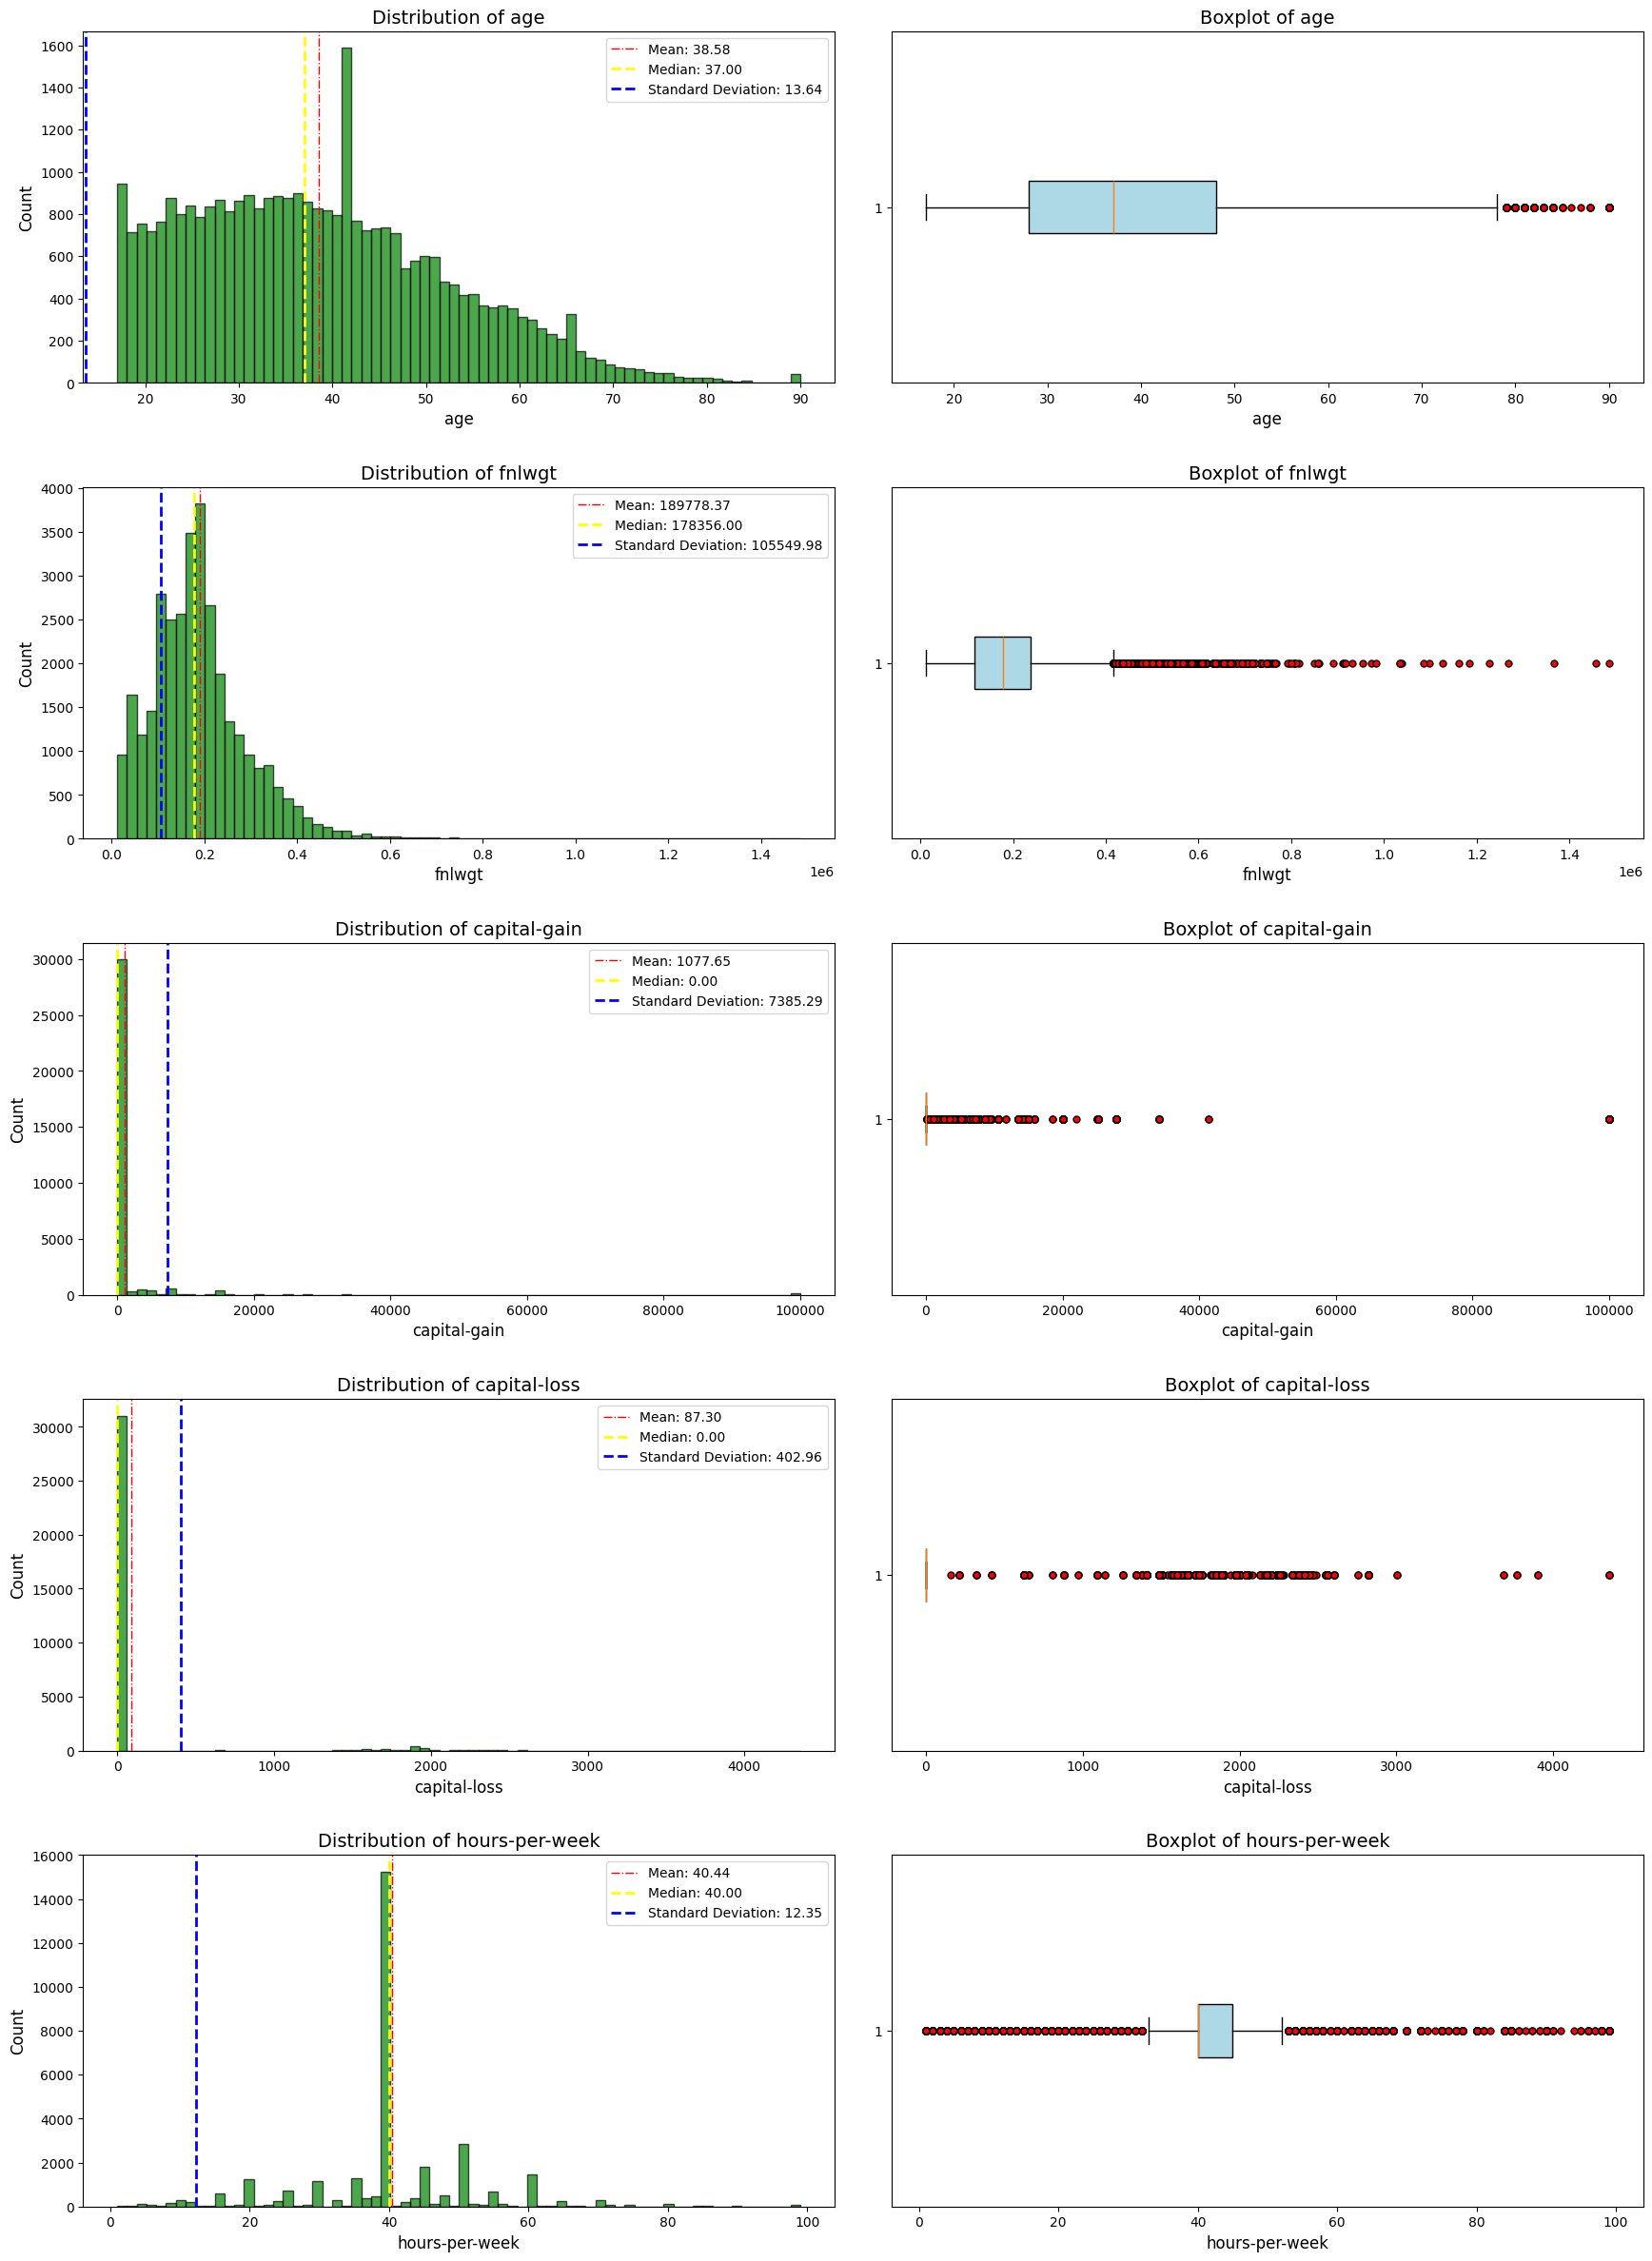

In [469]:
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(18, 5 * len(numerical_columns)))
color = 'green'

for i, feature in enumerate(numerical_columns):
    data = train[feature].dropna()  # Handle NaN values once
    mean = data.mean()
    median = data.median()
    std = data.std()
    
    # Histogram with Mean and Median Lines
    axes[i, 0].hist(data, color=color, bins=70, edgecolor='black', alpha=0.7)
    axes[i, 0].axvline(mean, linestyle='-.', color='red', linewidth=1, label=f'Mean: {mean:.2f}')
    axes[i, 0].axvline(median, linestyle='--', color='yellow', linewidth=2, label=f'Median: {median:.2f}')
    axes[i, 0].axvline(std, linestyle='--', color='blue', linewidth=2, label=f'Standard Deviation: {std:.2f}')
    axes[i, 0].legend(loc='upper right', fontsize=10)
    axes[i, 0].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i, 0].set_xlabel(feature, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)

    # Boxplot with Outlier Markers
    axes[i, 1].boxplot(data, vert=False, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', color='black'),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
    axes[i, 1].set_title(f'Boxplot of {feature}', fontsize=14)
    axes[i, 1].set_xlabel(feature, fontsize=12)

# Adjust layout and add spacing
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.95)  # Ensure no overlap with top title if added
plt.show()


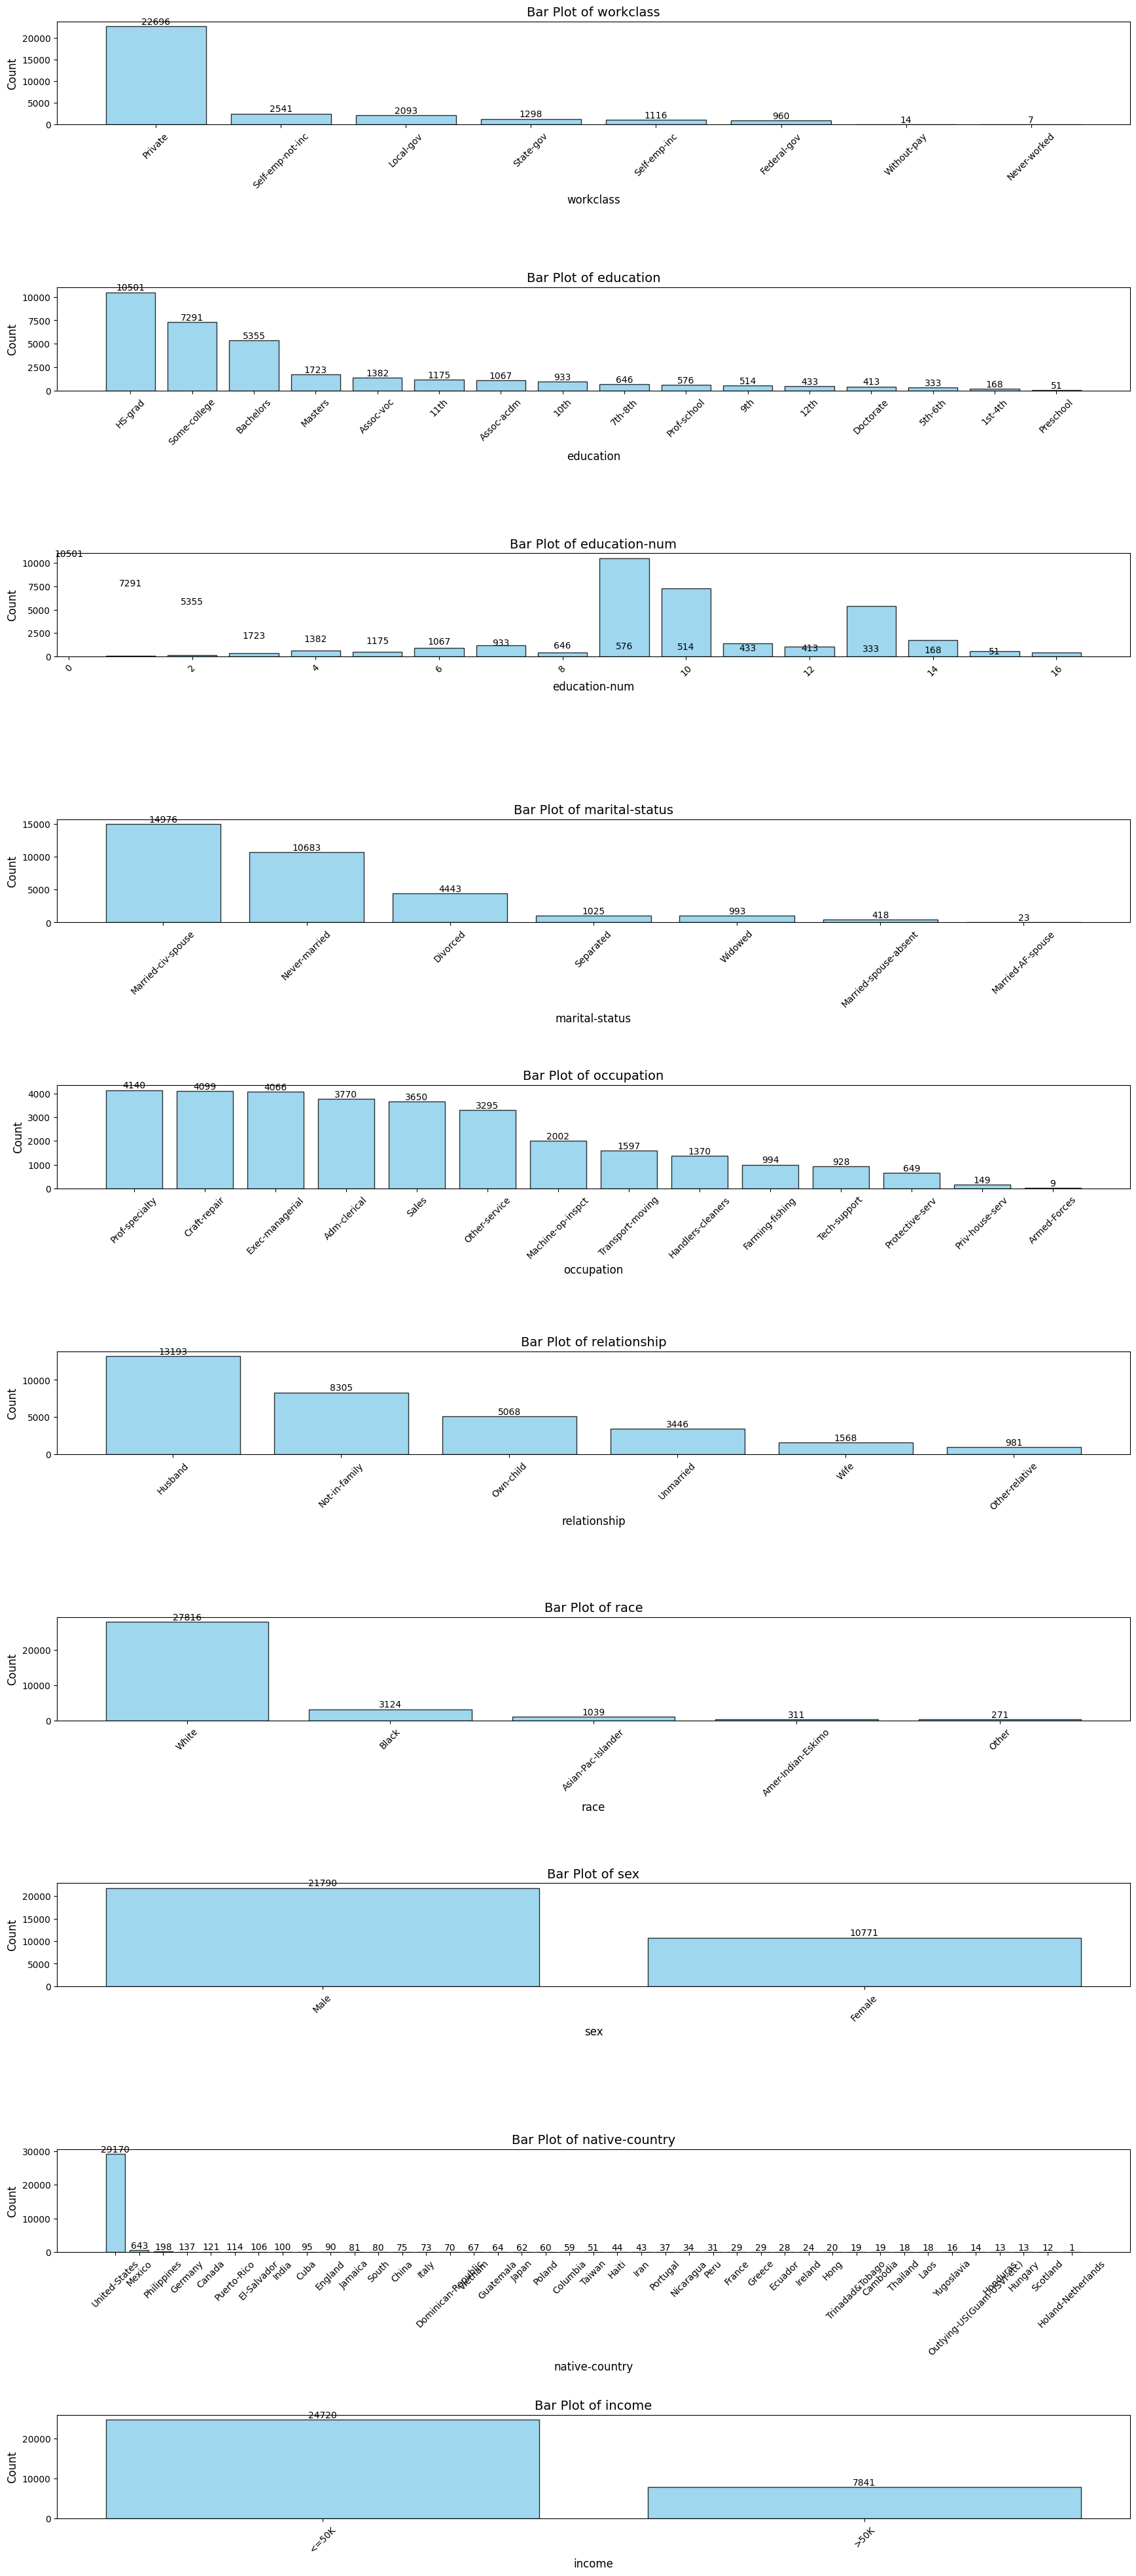

In [489]:
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(18, 4 * len(categorical_columns)))
for i, feature in enumerate(categorical_columns):
    data = train[feature].dropna()
    
    value_counts = data.value_counts(ascending=False)
    axes[i].bar(x=value_counts.index, height=value_counts.values, color='skyblue', edgecolor='black', alpha=0.8)
    for j, value in enumerate(value_counts.values):
        axes[i].text(j, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=10, color='black')

    axes[i].set_title(f'Bar Plot of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

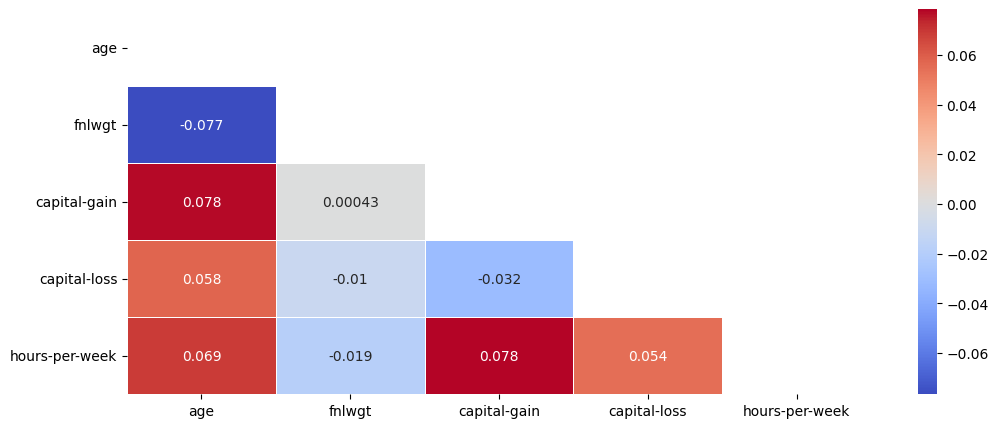

In [459]:
plt.figure(figsize=(12, 5))
corr = train[numerical_columns].corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, linewidths=0.5)
plt.show()